In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d datamunge/sign-language-mnist

 66% 41.0M/62.6M [00:00<00:00, 38.8MB/s]
100% 62.6M/62.6M [00:00<00:00, 80.5MB/s]


In [3]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
def train_ml(X_train, y_train, X_test, y_test):

  print('-- Training LR --')
  lr = LogisticRegression(max_iter=2000, n_jobs=-1)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  acc_lr = accuracy_score(y_test, y_pred)
  print('-- LR Trained --')

  print('-- Training SVC --')
  svc = SVC()
  svc.fit(X_train, y_train)
  y_pred_svc = svc.predict(X_test)
  acc_svc = accuracy_score(y_test, y_pred_svc)
  print('-- SVC Trained --')

  print('-- Training DTR --')
  dtr = DecisionTreeClassifier()
  dtr.fit(X_train, y_train)
  y_pred_dtr = dtr.predict(X_test)
  acc_dtr = accuracy_score(y_test, y_pred_dtr)
  print('-- DTR Trained --')

  print('-- Training RFR --')
  rfr = RandomForestClassifier(n_jobs=-1)
  rfr.fit(X_train, y_train)
  y_pred_rfr = rfr.predict(X_test)
  acc_rfr = accuracy_score(y_test, y_pred_rfr)
  print('-- RFR Trained --')

  pred = pd.DataFrame({'Model': ['LR', 'SVC', 'DTR', 'RFR'], 'Accuracy': [acc_lr, acc_svc, acc_dtr, acc_rfr]})

  return pred

In [0]:
def get_label(code):
  return chr(code+65)

In [0]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [0]:
X_train, y_train = train_df.iloc[:, 1:], train_df.iloc[:, 0]
X_test, y_test = test_df.iloc[:, 1:], test_df.iloc[:, 0]

<Figure size 432x288 with 0 Axes>

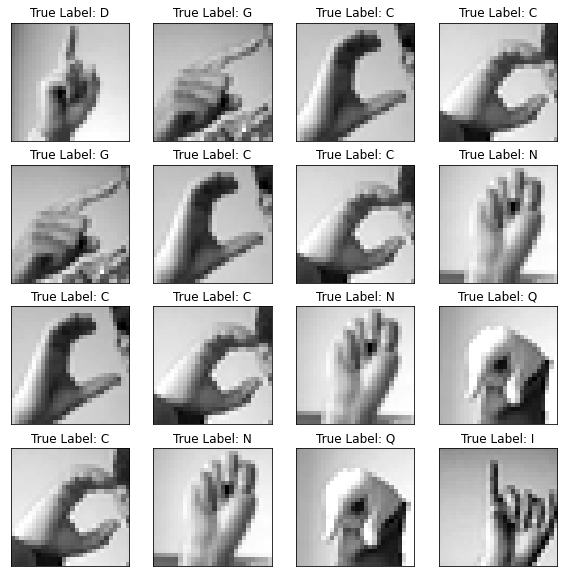

In [9]:
plt.figure()

f, axarr = plt.subplots(4, 4, figsize=(10, 10)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

for i in range(4):
  for j in range(4):
    fig = axarr[i][j].imshow(X_train.iloc[i+j, :].values.reshape(28, 28), cmap='gray')
    axarr[i][j].set_title('True Label: '+get_label(y_train[i+j]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

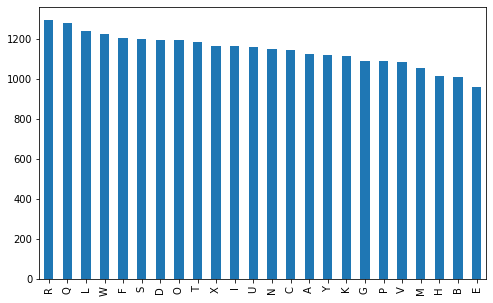

In [10]:
fig = y_train.apply(get_label).value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))

In [0]:
X_train /= 255.
X_test /= 255.

In [16]:
pred = train_ml(X_train, y_train, X_test, y_test)
pred

-- Training LR --
-- LR Trained --
-- Training SVC --
-- SVC Trained --
-- Training DTR --
-- DTR Trained --
-- Training RFR --
-- RFR Trained --


,Model,Accuracy
0,LR,0.691718
1,SVC,0.841885
2,DTR,0.441021
3,RFR,0.811210
